In [1]:
# -*- coding: utf-8 -*-
"""
Created on Fri Sep 15 15:59:47 2017

@author: Philipe Leal
"""

'\nCreated on Fri Sep 15 15:59:47 2017\n\n@author: Philipe Leal\n'

# Usually, the datasets that we want to examine are available in text form (JSON, Excel, simple txt file, etc.) 
but in our case, networkx provide it for us. Also, to compare our algorithms, we want the truth about the members (who followed whom) 
which unfortunately is not provided. But with these two lines of code, 
you will be able to load the data and store the truth (from now on,
we will refer it as ground truth):

In [2]:
#Comecando pelas bibliotecas:

from sklearn import cluster
import networkx as nx
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score

# Definindo Algumas Funcoes: 

In [3]:
# Declaration of functions
def drawCommunities(G, partition, pos):
    # G is graph in networkx form
    # Partition is a dict containing info on clusters
    # Pos is base on networkx spring layout (nx.spring_layout(G))

    # For separating communities colors
    dictList = defaultdict(list)
    nodelist = []
    for node, com in partition.items():
        dictList[com].append(node)

    # Get size of Communities
    size = len(set(partition.values()))

    # For loop to assign communities colors
    for i in range(size):

        amplifier = i % 3
        multi = (i / 3) * 0.3

        red = green = blue = 0

        if amplifier == 0:
            red = 0.1 + multi
        elif amplifier == 1:
            green = 0.1 + multi
        else:
            blue = 0.1 + multi

        # Draw Nodes
        nx.draw_networkx_nodes(G, pos,
                               nodelist=dictList[i],
                               node_color=[0.0 + red, 0.0 + green, 0.0 + blue],
                               node_size=500,
                               alpha=0.8)

    # Draw edges and final plot
    plt.title("Zachary's Karate Club")
    nx.draw_networkx_edges(G, pos, alpha=0.5)

def listToDict(list):
    listdict = {}

    for i in range(len(list)):
        listdict[i] = list[i]

    return listdict

def graphToEdgeMatrix(G):
    # Initialize Edge Matrix
    edgeMat = [[0 for x in range(len(G))] for y in range(len(G))]

    # For loop to set 0 or 1 ( diagonal elements are set to 1)
    for node in G:
        tempNeighList = G.neighbors(node)
        for neighbor in tempNeighList:
            edgeMat[node][neighbor] = 1
        edgeMat[node][node] = 1

    return edgeMat


In [4]:
# Initialize some variables to help us with the generalization of the program
kClusters = 2
results = []
nmiResults = []
arsResults = []

In [5]:
G = nx.karate_club_graph()
groundTruth = [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [6]:
# Transform our graph data into matrix form
edgeMat = graphToEdgeMatrix(G)

In [7]:
# Positions the nodes using Fruchterman-Reingold force-directed algorithm
# Too technical to discuss right now, just go with it
pos = nx.spring_layout(G)
drawCommunities(G, listToDict(groundTruth), pos)

# Spectral:
The Spectral clustering technique applies clustering to a projection of the normalized Laplacian. When it comes to image clustering, spectral clustering works quite well. See the next few lines of Python for all the magic:

In [8]:
# Spectral Clustering Model
spectral = cluster.SpectralClustering(n_clusters=kClusters, affinity="precomputed", n_init=200)
spectral.fit(edgeMat)

# Transform our data to list form and store them in results list
results.append(list(spectral.labels_))



# Agglomerative Clustering:
The main idea behind agglomerative clustering is that each node starts in its own cluster, and recursively merges with the pair of clusters that minimally increases a given linkage distance. The main advantage of agglomerative clustering (and hierarchical clustering in general) is that you don’t need to specify the number of clusters. That of course, comes with a price: performance. But, in scikit’s implementation, you can specify the number of clusters to assist the algorithm’s performance. To create and train an agglomerative model use the following code:

In [9]:
# -----------------------------------------

# Agglomerative Clustering Model
agglomerative = cluster.AgglomerativeClustering(n_clusters=kClusters, linkage="ward")
agglomerative.fit(edgeMat)

# Transform our data to list form and store them in results list
results.append(list(agglomerative.labels_))

# -----------------------------------------
# K-means Clustering Model
kmeans = cluster.KMeans(n_clusters=kClusters, n_init=200)
kmeans.fit(edgeMat)

# Transform our data to list form and store them in results list
results.append(list(kmeans.labels_))


In [10]:
# -----------------------------------------

# Affinity Propagation Clustering Model
affinity = cluster.affinity_propagation(S=edgeMat, max_iter=200, damping=0.6)

# Transform our data to list form and store them in results list
results.append(list(affinity[1]))

# Append the results into lists
for x in results:
    nmiResults.append(normalized_mutual_info_score(groundTruth, x))
    arsResults.append(adjusted_rand_score(groundTruth, x))

# -----------------------------------------


# Code for plotting results



## Normalized Mutual Information (NMI)
Mutual Information of two random variables is a measure of the mutual dependence between the two variables. Normalized Mutual Information is a normalization of the Mutual Information (MI) score to scale the results between 0 (no mutual information) and 1 (perfect correlation). In other words, 0 means dissimilar and 1 means perfect match.

Adjusted Rand Score (ARS) Adjusted Rand Score on the other hand, computes a similarity measure between two clusters by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusters. If that's a little weird to think about, have in mind that, for now, 0 is the lowest similarity and 1 is the highest.

So, to get a combination of these metrics (the NMI and ARS), we simply calculate the average value of their sum. And remember, the higher the number, the better the result.

Below, I have plotted the score evaluation so we can get a better understanding of our results. We could plot them in many ways, as points, as a straight line, but I think a bar chart is the better choice for our case. To do so, just use the following code:


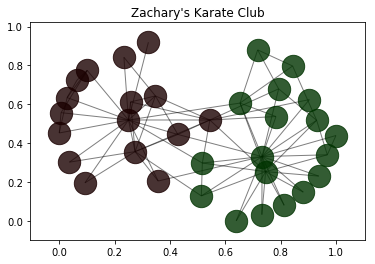

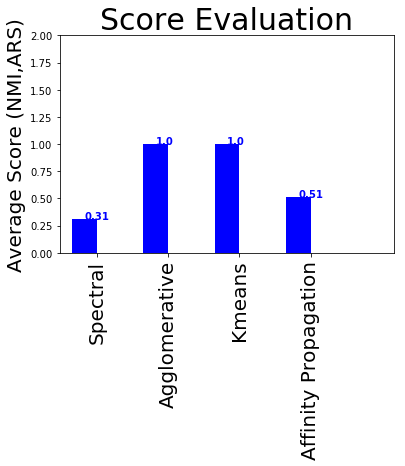

In [11]:
# Average of NMI and ARS
y = [sum(x) / 2 for x in zip(nmiResults, arsResults)]

xlabels = ['Spectral', 'Agglomerative', 'Kmeans', 'Affinity Propagation']

fig = plt.figure()
ax = fig.add_subplot(111)

# Set parameters for plotting
ind = np.arange(len(y))
width = 0.35

# Create barchart and set the axis limits and titles
ax.bar(ind, y, width, color='blue', error_kw=dict(elinewidth=4, ecolor='red'))
ax.set_xlim(-width, len(ind) + width, auto=True )
ax.set_ylim(0, 2)
ax.set_ylabel('Average Score (NMI,ARS)',fontsize=20)
ax.set_title('Score Evaluation', fontsize = 30)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

# Add the xlabels to the chart
ax.set_xticks(ind + width / 2)
xtickNames = ax.set_xticklabels(xlabels,fontsize=20)
plt.setp(xtickNames, fontsize=20)

# Add the actual value on top of each chart
for i, v in enumerate(y):
    ax.text(i, v, str(round(v, 2)), color='blue', fontweight='bold')

# Show the final plot
plt.show()